In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Objetos de sklearn para hacer tópicos
from sklearn.feature_extraction.text import CountVectorizer # Contador de frecuencia
from sklearn.feature_extraction.text import TfidfTransformer # Creador de tf-idf

# Algoritmos de descomposición de tópicos
from sklearn.decomposition import NMF 
from sklearn.decomposition import LatentDirichletAllocation

# Importamos nltk para extraer stopwords 
import nltk 
nltk.download('stopwords')

# Librería para hacer wordclouds
from wordcloud import WordCloud

In [4]:
# cargamos el dataframe de entrenamiento y el dataframe de testeo
filename_train = '/home/nacho/Documentos/Python/BooksReviews/goodreads_train.csv' 
filename_test = '/home/nacho/Documentos/Python/BooksReviews/goodreads_test.csv'

df_train = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)

In [7]:
df_test=df_test.drop_duplicates()

df_train=df_train.drop_duplicates()

df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


Ver cantidad de ratings 0

Palabras Stars

In [11]:
rating = df_train['rating'].value_counts()

In [17]:
len(df_train)

900000

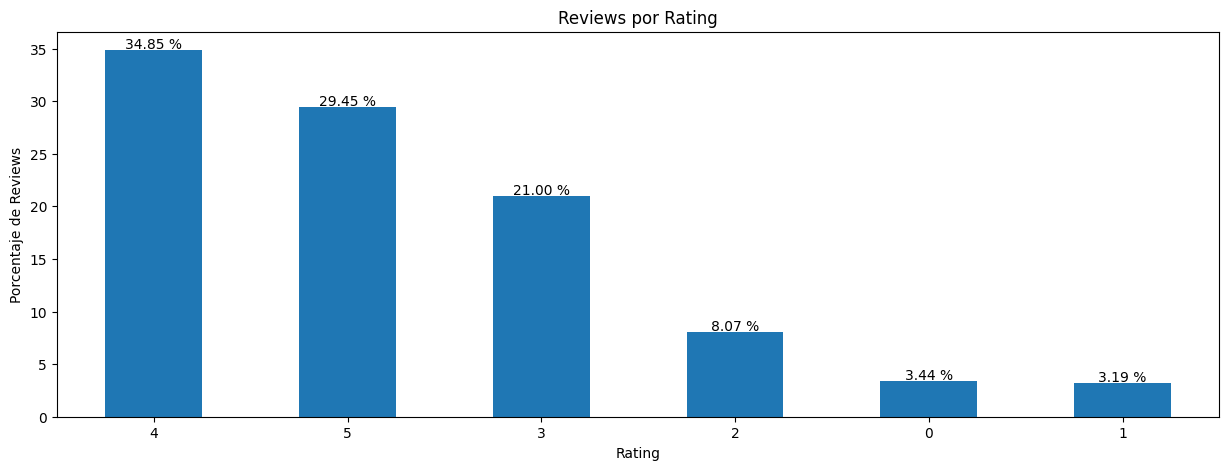

In [25]:
promedio = rating.sort_values(ascending=False)/9000 #Ordeno de forma descendente

def numeros(x, y): #Funcion para poner los numeros encima de las barras
    for i in range(len(x)):
        ax.text(i, y[i]+.15,'{:.2f} %'.format(round(y[i], 2)), ha="center")

ax = promedio.plot.bar(figsize = (15,5))
ax.set_xticklabels(promedio.index.astype(int), rotation='horizontal')
ax.set_xlabel('Rating')
ax.set_ylabel('Porcentaje de Reviews')
ax.set_title('Reviews por Rating')
numeros(promedio.index,promedio.values)